# I. Предисловие

Данные собраны из сайта krisha.kz, с фильтром по городу Астана.
built_type - тип строения
year_built - год постройки
flour - этаж
area - площадь
condition - состояние
bathrooms - сан. узлы
balcony - балконы
exchange - возможность обменять
furniture - мебель
security - охрана, домофон и т.д
ceil - высота потолков
parking - паркинг
residance - жилой комплекс
phone - проводной телефон
floor - тип пола
door - тип двери
balcony_glass - стеклянный балкон
ex_dormetory - бывш. общежитие
inernet - интернет
id - уникальный номер
userType - тип пользователя
rooms - количество комнат
lat - широта
lon - долгота
district - район
street - улица
house_num - номер квартиры
price - цена


# II. Импорт данных и библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../data/krisha.csv')
df

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,security,...,inernet,id,userType,rooms,lat,lon,district,street,house_num,price
0,монолитный,2016,4 из 9,99.0,хорошее,2 с/у и более,несколько балконов или лоджий,NaN,частично,"домофон, видеонаблюдение",...,оптика,674641098,owner,3,51.134068,71.367502,Esilyskiy_r-n,Ilyyasa_Omarova,NaN,40000000
1,кирпичный,2012,4 из 6,45.8,хорошее,совмещенный,балкон,NaN,частично,"домофон, видеонаблюдение",...,оптика,676011227,owner,1,51.123006,71.503660,Almaty_r-n,Temirbeka_Zhurgenova,27,19000000
2,кирпичный,2021,2 из 10,90.0,NaN,NaN,NaN,NaN,NaN,"охрана, видеонаблюдение",...,NaN,681148481,specialist,3,51.101005,71.401826,Esilyskiy_r-n,Uly_Dala,NaN,53999999
3,кирпичный,2021,2 из 8,62.0,среднее,NaN,NaN,Не интересует,NaN,NaN,...,NaN,681724680,owner,2,51.172030,71.394117,Saryarka_r-n,Zhambyl,10,31000000
4,NaN,2005,7 из 12,36.2,хорошее,совмещенный,балкон,Не интересует,NaN,"домофон, сигнализация, видеонаблюдение",...,NaN,681619392,owner,1,51.153648,71.500749,Almaty_r-n,Musrepova,7,17500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,кирпичный,2021,12 из 16,40.0,NaN,NaN,NaN,Не интересует,NaN,NaN,...,NaN,679139665,specialist,2,51.132520,71.378390,Esilyskiy_r-n,E-753,3,21299000
5782,NaN,2014,8 из 9,39.0,NaN,NaN,NaN,Не интересует,NaN,NaN,...,NaN,681784419,owner,1,51.158612,71.502708,Almaty_r-n,Kudayberdiuly,23,18500000
5783,монолитный,2021,10 из 12,100.0,хорошее,NaN,NaN,Не интересует,NaN,NaN,...,NaN,680610156,specialist,4,51.126986,71.395395,Esilyskiy_r-n,Tole_bi,NaN,62000000
5784,NaN,2017,8 из 9,60.0,хорошее,раздельный,лоджия,NaN,NaN,NaN,...,ADSL,681669989,specialist,2,51.125056,71.359905,Esilyskiy_r-n,Zh_Moldagalieva,2,23000000


# III. Подготовка данных

In [3]:
from utils.preparation import *

## 1. Первичное удаление лишних столбцов

Удаление столбцов, до учитывания их веса как feature.
Только для самых явных столбцов по значению.

### 1.1 Удаление идентификаторов

ИД и номер квартиры не могут иметь веса для модели

In [4]:
for col in ('id', 'house_num'):
    df = df.drop(col, axis=1)


## 2. Первичное преобразование не явных типов

Например, колонку ceil преобразуем из строки '2.5 м' в число 2.5.

### 2.1 Преобразование числовых строк в обычные числа

In [5]:
df['max_flours'] = df['flour'].apply(get_max_floor).astype('Int64')
df['flour'] = df['flour'].apply(get_current_floor).astype('Int64')
df['ceil'] = df['ceil'].str.replace(' м', '').astype('Float64')
df[['max_flours', 'flour', 'ceil']]

,max_flours,flour,ceil
0,9,4,2.7
1,6,4,2.5
2,10,2,3.0
3,8,2,2.7
4,12,7,<NA>
...,...,...,...
5781,16,12,3.0
5782,9,8,<NA>
5783,12,10,3.0
5784,9,8,2.7


### 2.2 Преобразование строки-списка в отдельные столбцы

In [6]:
get_security_types(df.security)


['домофон',
 'видеонаблюдение',
 'охрана',
 'сигнализация',
 'кодовый замок',
 'видеодомофон',
 'консьерж',
 'решетки на окнах']

In [7]:
security_names = {
    'has_intercom': 'домофон',
    'has_video_control': 'видеонаблюдение',
    'has_guard': 'охрана',
    'has_alarm': 'сигнализация',
    'has_video_intercom': 'видеодомофон',
    'has_concierge': 'консьерж',
    'has_bars': 'решетки на окнах',
}

In [8]:
for field_name, token in security_names.items():
    df[field_name] = df['security'].apply(has_token, token=token).astype('object')
df = df.drop('security', axis=1)


### Итог

In [9]:
df.dtypes

built_type             object
year_built              int64
flour                   Int64
area                  float64
condition              object
bathrooms              object
balcony                object
exchange               object
furniture              object
ceil                  Float64
parking                object
residance              object
phone                  object
floor                  object
door                   object
balcony_glass          object
ex_dormetory           object
inernet                object
userType               object
rooms                   int64
lat                   float64
lon                   float64
district               object
street                 object
price                   int64
max_flours              Int64
has_intercom           object
has_video_control      object
has_guard              object
has_alarm              object
has_video_intercom     object
has_concierge          object
has_bars               object
dtype: obj

## 3. Замена отсутствующих значений

In [10]:
df.isna().sum()


built_type             341
year_built               0
flour                  149
area                     0
condition             2019
bathrooms             1936
balcony               2311
exchange              3084
furniture             4316
ceil                   771
parking               2435
residance             1496
phone                 4184
floor                 3026
door                  2632
balcony_glass         2731
ex_dormetory           144
inernet               3677
userType                 0
rooms                    0
lat                      0
lon                      0
district               306
street                   0
price                    0
max_flours             261
has_intercom             0
has_video_control        0
has_guard                0
has_alarm                0
has_video_intercom       0
has_concierge            0
has_bars                 0
dtype: int64

### 3.1 Замена столбцов, с числовыми значениями

In [11]:
null_count = df.select_dtypes(include=[np.number]).isna().sum()
null_count

year_built      0
flour         149
area            0
ceil          771
rooms           0
lat             0
lon             0
price           0
max_flours    261
dtype: int64

Столбцы, с числовыми значениями, у которых отсутствуют данные:

In [12]:
with_null = null_count[null_count!=0]
with_null

flour         149
ceil          771
max_flours    261
dtype: int64

Заменяем их на самые частые значения

In [13]:
for field in with_null.keys():
    print(field, df[field].mode()[0])
    df[field].fillna(df[field].mode()[0], inplace=True)

df[with_null.keys()]

flour 3
ceil 2.7
max_flours 9


,flour,ceil,max_flours
0,4,2.7,9
1,4,2.5,6
2,2,3.0,10
3,2,2.7,8
4,7,2.7,12
...,...,...,...
5781,12,3.0,16
5782,8,2.7,9
5783,10,3.0,12
5784,8,2.7,9


Итог:

In [14]:
df.select_dtypes(include=[np.number]).isna().sum()

year_built    0
flour         0
area          0
ceil          0
rooms         0
lat           0
lon           0
price         0
max_flours    0
dtype: int64

### 3.2 Замена столбцов, с категориальными значениям

In [15]:
categorical_columns_with_null = []
for col in df:
    if len(df[col].unique()) < 10 and df[col].isna().sum() > 0:
        print(col, df[col].unique())
        categorical_columns_with_null.append(col)

built_type ['монолитный' 'кирпичный' nan 'иное' 'панельный']
condition ['хорошее' nan 'среднее' 'черновая отделка' 'свободная планировка'
 'требует ремонта']
bathrooms ['2 с/у и более' 'совмещенный' nan 'раздельный' 'нет']
balcony ['несколько балконов или лоджий' 'балкон' nan 'лоджия' 'балкон и лоджия']
exchange [nan 'Не интересует' 'Возможен обмен']
furniture ['частично' nan 'полностью' 'без мебели']
parking [nan 'паркинг' 'рядом охраняемая стоянка' 'гараж']
phone ['отдельный' 'нет' nan 'есть возможность подключения' 'блокиратор']
floor ['линолеум' nan 'ламинат' 'паркет' 'пробковый' 'плитка' 'дерево'
 'ковролан']
door ['металлическая' nan 'бронированная' 'деревянная']
balcony_glass ['да' nan 'нет']
ex_dormetory ['нет' nan 'да']
inernet ['оптика' nan 'ADSL' 'проводной' 'через TV кабель']
district ['Esilyskiy_r-n' 'Almaty_r-n' 'Saryarka_r-n' 'r-n_Baykonur' nan]


In [16]:
df[categorical_columns_with_null].isna().sum()

built_type        341
condition        2019
bathrooms        1936
balcony          2311
exchange         3084
furniture        4316
parking          2435
phone            4184
floor            3026
door             2632
balcony_glass    2731
ex_dormetory      144
inernet          3677
district          306
dtype: int64

Заменяем их на самые частые значения

In [17]:
for field in categorical_columns_with_null:
    print(field, df[field].mode()[0])
    df[field].fillna(df[field].mode()[0], inplace=True)

built_type монолитный
condition хорошее
bathrooms совмещенный
balcony лоджия
exchange Не интересует
furniture полностью
parking паркинг
phone есть возможность подключения
floor ламинат
door металлическая
balcony_glass да
ex_dormetory нет
inernet ADSL
district Esilyskiy_r-n


Итог:

In [18]:
df[categorical_columns_with_null].isna().sum()


built_type       0
condition        0
bathrooms        0
balcony          0
exchange         0
furniture        0
parking          0
phone            0
floor            0
door             0
balcony_glass    0
ex_dormetory     0
inernet          0
district         0
dtype: int64

### 3.3 Замена столбцов, с текстовыми значениями

In [19]:
string_columns_with_null = []
for col in df:
    if len(df[col].unique()) > 10 and df[col].isna().sum() > 0:
        #print(col, df[col].unique())
        string_columns_with_null.append(col)

In [20]:
df[string_columns_with_null].isna().sum()

residance    1496
dtype: int64

In [21]:
for field in string_columns_with_null:
    df[field].fillna('Не указан', inplace=True)

Итог:

In [22]:
df.isna().sum()

built_type            0
year_built            0
flour                 0
area                  0
condition             0
bathrooms             0
balcony               0
exchange              0
furniture             0
ceil                  0
parking               0
residance             0
phone                 0
floor                 0
door                  0
balcony_glass         0
ex_dormetory          0
inernet               0
userType              0
rooms                 0
lat                   0
lon                   0
district              0
street                0
price                 0
max_flours            0
has_intercom          0
has_video_control     0
has_guard             0
has_alarm             0
has_video_intercom    0
has_concierge         0
has_bars              0
dtype: int64

## 4. Назначение весов, числовых значений

Определяем вес каждой фичи в числовом формате

### 4.1 Бинарные значения
Столбцы, с двоичными значениями:


In [23]:
binary_cols = []
for col in df:
    if len(df[col].unique()) < 3:
        binary_cols.append(col)
        print(col, df[col].unique())


exchange ['Не интересует' 'Возможен обмен']
balcony_glass ['да' 'нет']
ex_dormetory ['нет' 'да']
has_intercom ['да' 'нет']
has_video_control ['да' 'нет']
has_guard ['нет' 'да']
has_alarm ['нет' 'да']
has_video_intercom ['нет' 'да']
has_concierge ['нет' 'да']
has_bars ['нет' 'да']


Преобразуем данные, формата "Да/Нет" в 1/0 соответственно.


In [24]:
for field in binary_cols:
    df[field] = df[field].apply(check_true).astype('int64')

df[binary_cols]

,exchange,balcony_glass,ex_dormetory,has_intercom,has_video_control,has_guard,has_alarm,has_video_intercom,has_concierge,has_bars
0,0,1,0,1,1,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5781,0,1,0,0,0,0,0,0,0,0
5782,0,1,0,0,0,0,0,0,0,0
5783,0,1,0,0,0,0,0,0,0,0
5784,0,1,0,0,0,0,0,0,0,0


### 4.2 Категориальные значения

Сортируем категории в зависимости от того, насколько хорошо они влияют на стоимость.
Например, панельные дома в среднем стоят 23 миллиона, а монолитные 43 млн.
Соответственно присваиваем им значения:
1. у панельного 0
2. у кирпичного 1
3. у иного 2
4. у монолитного 3

In [25]:
df.price.groupby(df['built_type']).mean().sort_values()


built_type
панельный     2.300764e+07
кирпичный     3.329811e+07
иное          3.730618e+07
монолитный    4.324374e+07
Name: price, dtype: float64

In [26]:
numeric_values = {}
for field in df.select_dtypes(include=['object']):
    temp_val = {}
    for i, val in enumerate(df.price.groupby(df[field]).mean().sort_values().keys().values):
        temp_val[val]=i
    numeric_values[field] = temp_val

# Вывод 10 самых дорогих
for k,v in numeric_values.items():
    print(k, dict(list(v.items())[-10:]))

built_type {'панельный': 0, 'кирпичный': 1, 'иное': 2, 'монолитный': 3}
condition {'требует ремонта': 0, 'среднее': 1, 'черновая отделка': 2, 'свободная планировка': 3, 'хорошее': 4}
bathrooms {'нет': 0, 'совмещенный': 1, 'раздельный': 2, '2 с/у и более': 3}
balcony {'балкон': 0, 'лоджия': 1, 'балкон и лоджия': 2, 'несколько балконов или лоджий': 3}
furniture {'без мебели': 0, 'полностью': 1, 'частично': 2}
parking {'рядом охраняемая стоянка': 0, 'паркинг': 1, 'гараж': 2}
residance {'Арай-1': 723, 'Mangilik El': 724, 'Аристократ': 725, 'Арай-2': 726, 'Жарык': 727, 'Грин виладж': 728, 'parkhouse': 729, 'Baisanat': 730, 'Арман': 731, 'Rixos Khan Shatyr Residences': 732}
phone {'нет': 0, 'есть возможность подключения': 1, 'отдельный': 2, 'блокиратор': 3}
floor {'линолеум': 0, 'плитка': 1, 'пробковый': 2, 'ламинат': 3, 'ковролан': 4, 'дерево': 5, 'паркет': 6}
door {'металлическая': 0, 'деревянная': 1, 'бронированная': 2}
inernet {'проводной': 0, 'через TV кабель': 1, 'ADSL': 2, 'оптика': 3

In [27]:
for field in df.select_dtypes(include=['object']):
    df[field] = df[field].apply(lambda x: numeric_values.get(field).get(x)).astype('int32')


Итог:

In [28]:
df.dtypes

built_type              int32
year_built              int64
flour                   Int64
area                  float64
condition               int32
bathrooms               int32
balcony                 int32
exchange                int64
furniture               int32
ceil                  Float64
parking                 int32
residance               int32
phone                   int32
floor                   int32
door                    int32
balcony_glass           int64
ex_dormetory            int64
inernet                 int32
userType                int32
rooms                   int64
lat                   float64
lon                   float64
district                int32
street                  int32
price                   int64
max_flours              Int64
has_intercom            int64
has_video_control       int64
has_guard               int64
has_alarm               int64
has_video_intercom      int64
has_concierge           int64
has_bars                int64
dtype: obj

## 5. Добавление дополнительных столбцов

### 5.1 Цена за кв. м

In [29]:
df['sqr_price'] = np.floor(df['price'] / df['area']).astype('Int64')
df['sqr_price']

0       404040
1       414847
2       599999
3       500000
4       483425
         ...  
5781    532475
5782    474358
5783    620000
5784    383333
5785    872000
Name: sqr_price, Length: 5786, dtype: Int64

## 6. Исправление ошибочных данных
### 6.1 Забыли запятую при указании высоты

In [30]:
print(f"До: {df['ceil'][df['ceil']>5]}")
df['ceil'][df['ceil']>5] = df['ceil'][df['ceil']>5]/10
print(f"После: {df['ceil'][df['ceil']>5]}")

До: 66      27.0
3276    28.0
3917    28.0
5653    28.0
Name: ceil, dtype: Float64
После: Series([], Name: ceil, dtype: Float64)


~~### 6.2 Указали лишний ноль в цене~~

In [31]:
df.sqr_price.describe()

count           5786.0
mean     506941.124957
std      156098.928165
min           137169.0
25%           411764.0
50%           475385.5
75%           566037.0
max          2068965.0
Name: sqr_price, dtype: Float64

## 7. Удаление выбросов
### 7.1 Высота потолков

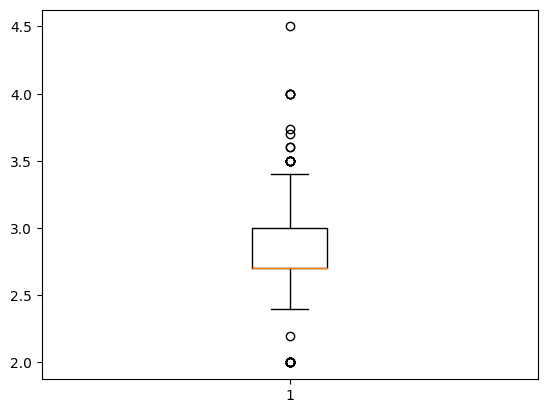

In [32]:
plt.boxplot(df.ceil)
plt.show()

### 7.2 Площадь

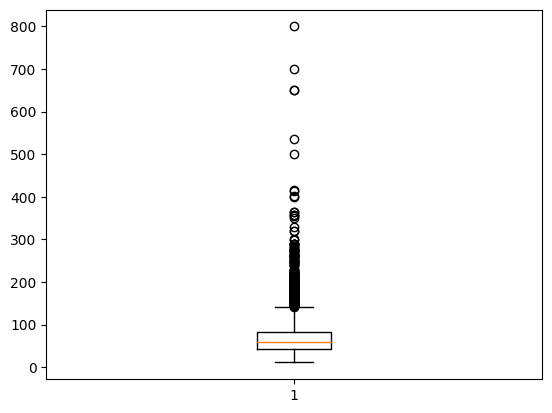

count    5786.000000
mean       69.837857
std        45.288339
min        11.000000
25%        42.000000
50%        59.000000
75%        82.000000
max       800.000000
Name: area, dtype: float64

In [33]:
plt.boxplot(df.area)
plt.show()
df.area.describe()

In [34]:
df[df.area>300]

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,ceil,...,price,max_flours,has_intercom,has_video_control,has_guard,has_alarm,has_video_intercom,has_concierge,has_bars,sqr_price
171,1,2013,5,350.0,4,3,3,0,1,3.2,...,195000000,7,1,1,0,1,1,0,0,557142
1331,1,2018,3,365.0,4,1,1,1,1,3.0,...,170000000,9,0,0,0,0,0,0,0,465753
1917,3,2014,2,500.0,4,1,1,0,1,3.2,...,400000000,5,0,0,0,0,0,0,0,800000
2118,1,2000,6,356.3,4,3,2,0,1,3.0,...,189500000,7,0,0,0,0,0,0,0,531855
2205,3,2006,22,329.8,4,1,0,0,2,3.0,...,148500000,22,0,1,1,0,0,1,0,450272
2473,1,2012,4,365.0,4,3,3,0,2,3.2,...,195000000,7,0,0,0,0,0,0,0,534246
2750,3,2016,20,650.0,4,1,1,0,1,3.0,...,560000000,22,0,0,0,0,0,0,0,861538
2863,3,2017,5,355.0,4,3,2,0,1,2.7,...,285000000,6,0,0,0,0,0,0,0,802816
3412,1,2015,7,535.0,4,1,1,0,1,3.0,...,230000000,8,0,0,0,0,0,0,0,429906
3664,3,2005,15,413.9,4,1,1,0,1,3.0,...,340000000,16,0,0,0,0,0,0,0,821454


19 квартир являются выбросами, с площадью более чем 300 кв. м.
Убираем их:

In [35]:
df = df[df.area<300]

Итог:

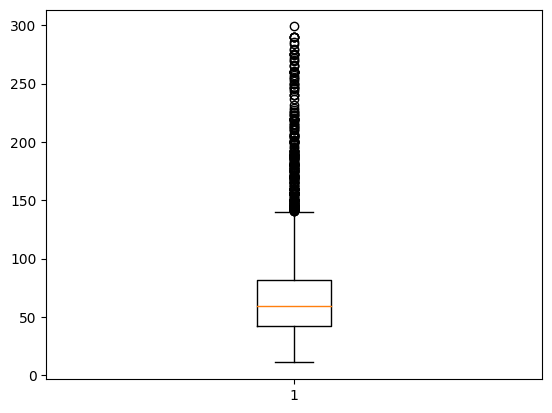

count    5766.000000
mean       68.539636
std        38.736775
min        11.000000
25%        42.000000
50%        59.000000
75%        81.275000
max       298.900000
Name: area, dtype: float64

In [36]:
plt.boxplot(df.area)
plt.show()
df.area.describe()


### 7.3 Этаж

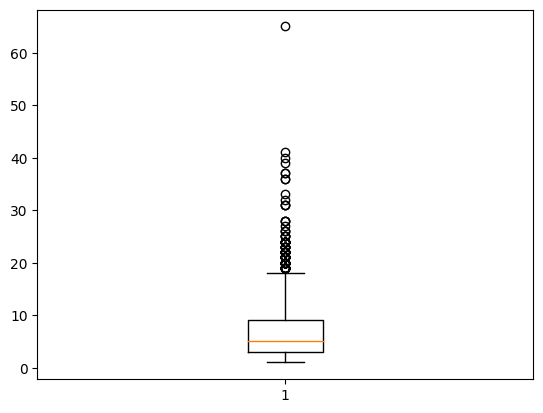

count      5766.0
mean     6.532431
std      4.506706
min           1.0
25%           3.0
50%           5.0
75%           9.0
max          65.0
Name: flour, dtype: Float64

In [37]:
plt.boxplot(df.flour)
plt.show()
df.flour.describe()

In [38]:
df[df.flour>50]

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,ceil,...,price,max_flours,has_intercom,has_video_control,has_guard,has_alarm,has_video_intercom,has_concierge,has_bars,sqr_price
2781,2,1988,65,63.0,4,1,1,0,1,2.7,...,19500000,9,0,0,0,0,0,0,0,309523


1 квартира является выбросом, она находится на 65-ом этаже.
Убираем его:

In [39]:
df = df[df.flour<50]

Итог:

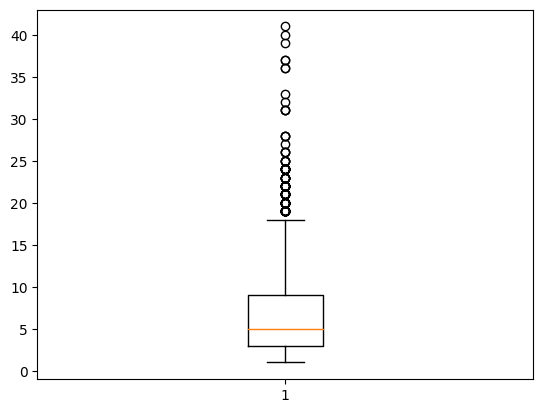

count    5765.000000
mean       68.540597
std        38.740066
min        11.000000
25%        42.000000
50%        59.000000
75%        81.300000
max       298.900000
Name: area, dtype: float64

In [40]:
plt.boxplot(df.flour)
plt.show()
df.area.describe()

### 7.4 Стоимость

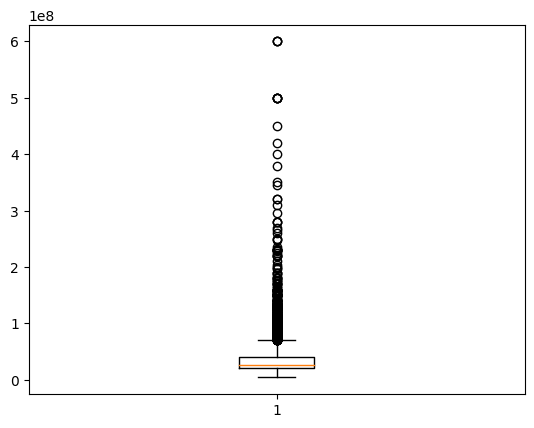

count    5.765000e+03
mean     3.678145e+07
std      3.650738e+07
min      4.000000e+06
25%      2.000000e+07
50%      2.700000e+07
75%      4.000000e+07
max      6.000000e+08
Name: price, dtype: float64

In [41]:
plt.boxplot(df.price)
plt.show()
df.price.describe()

In [42]:
df[df.price>300000000]

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,ceil,...,price,max_flours,has_intercom,has_video_control,has_guard,has_alarm,has_video_intercom,has_concierge,has_bars,sqr_price
31,3,2019,3,260.0,4,1,1,0,1,3.3,...,500000000,6,0,0,0,0,0,0,0,1923076
76,3,2019,3,260.0,4,1,1,0,1,3.3,...,499900000,6,0,0,0,0,0,0,0,1922692
294,1,2018,3,260.0,4,3,2,0,1,3.3,...,500000000,6,1,1,0,0,1,1,0,1923076
521,3,2016,9,250.0,4,3,1,0,1,4.5,...,345000000,9,0,0,0,0,0,0,0,1380000
1739,1,2018,6,275.0,4,1,1,0,1,3.2,...,320000000,7,0,0,0,0,0,0,0,1163636
1887,1,2017,5,167.0,4,3,1,0,1,3.3,...,310000000,6,0,0,0,0,0,0,0,1856287
2299,1,2018,3,260.0,4,3,1,0,1,3.3,...,499900000,6,0,0,0,0,0,0,0,1922692
2401,3,2012,24,290.0,4,1,1,0,1,3.0,...,600000000,26,0,0,0,0,0,0,0,2068965
2464,3,2012,24,290.0,4,1,1,0,1,3.0,...,600000000,26,0,0,0,0,0,0,0,2068965
2574,1,2017,5,210.0,4,3,1,0,1,3.3,...,400000000,6,0,0,0,0,0,0,0,1904761


17 квартир являются выбросами, со стоимостью более чем 300 млн тг.
Убираем их:

In [43]:
df = df[df.price<300000000]

Итог:

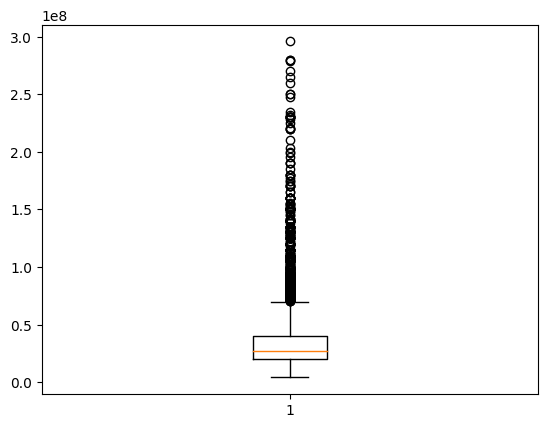

In [44]:
plt.boxplot(df.price)
plt.show()


### 8. Матрица корреляций

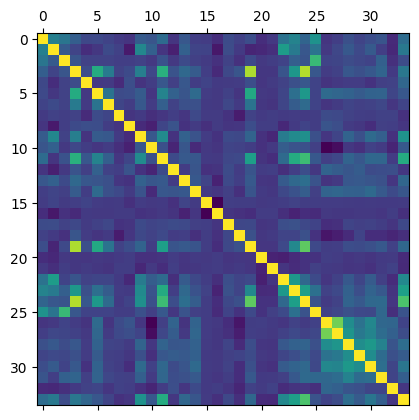

In [45]:
plt.matshow(df.corr())
plt.show()

In [46]:
df.corr().abs().unstack().sort_values(ascending=False)[34:50]

price              area                 0.860583
area               price                0.860583
                   rooms                0.852933
rooms              area                 0.852933
has_video_control  has_intercom         0.744444
has_intercom       has_video_control    0.744444
rooms              price                0.700703
price              rooms                0.700703
sqr_price          price                0.658449
price              sqr_price            0.658449
                   residance            0.620029
residance          price                0.620029
max_flours         flour                0.614413
flour              max_flours           0.614413
residance          area                 0.559107
area               residance            0.559107
dtype: float64

### 9. Распределение категорий

C:\Users\Khan\AppData\Local\Temp\ipykernel_2244\3190257392.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


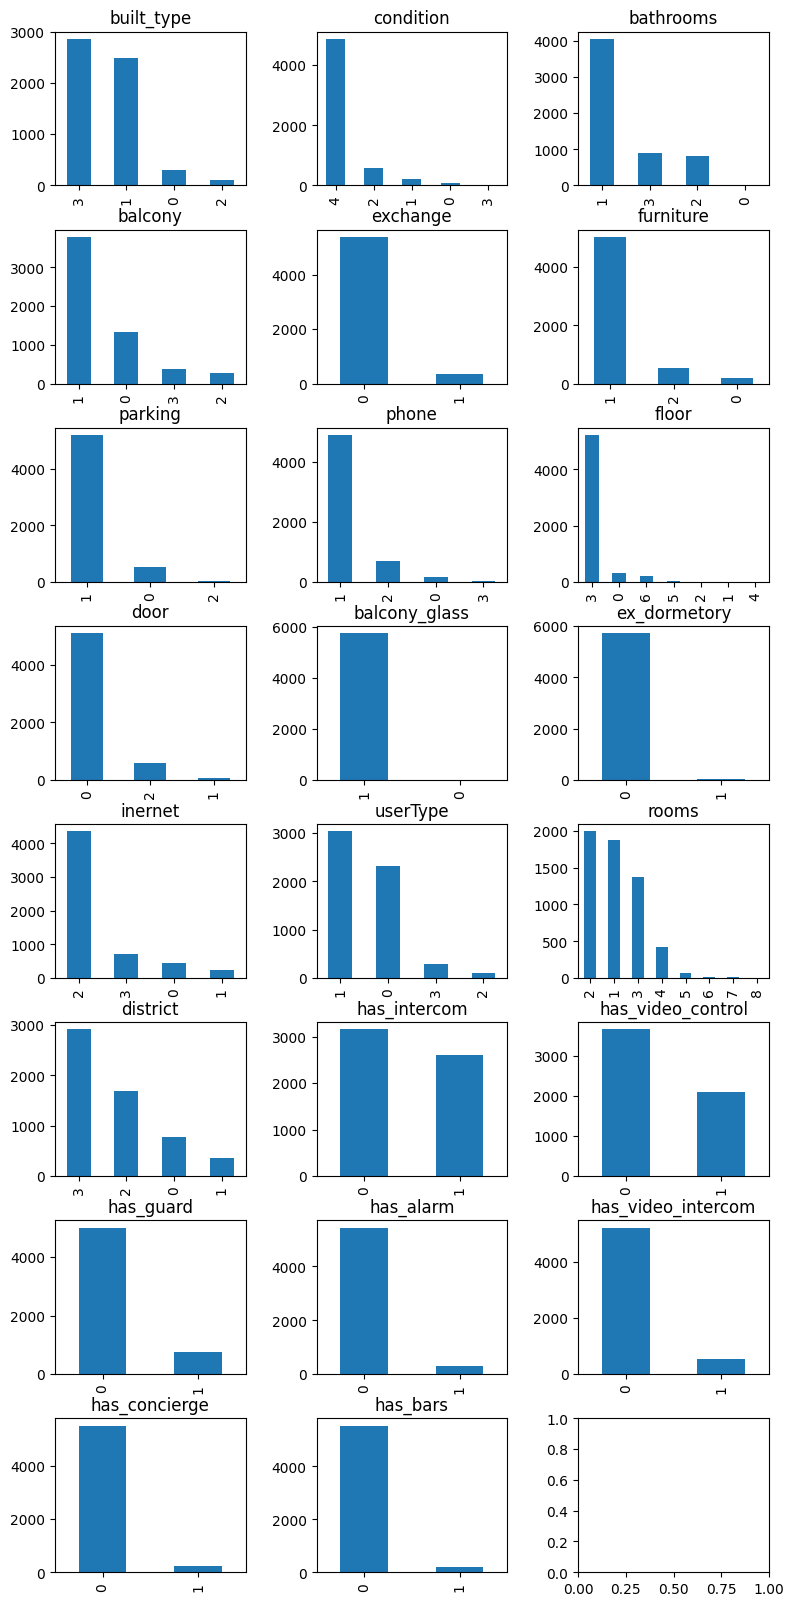

In [47]:
categorical_features = [col for col in df if len(df[col].unique())<10]
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(8, 16))
fig.tight_layout()
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i//3][i%3]).set_title(categorical_feature)
fig.show()

In [48]:
print(df.ex_dormetory.value_counts())
df.balcony_glass.value_counts()

0    5724
1      24
Name: ex_dormetory, dtype: int64


1    5747
0       1
Name: balcony_glass, dtype: int64

Эти столбцы не имеют статической значимости, удаляем их:

In [49]:
df = df.drop('ex_dormetory', axis=1)
df = df.drop('balcony_glass', axis=1)


# IV. Гипотезы

## 1. Монолитные дома стоят больше панельных

<AxesSubplot: xlabel='built_type'>

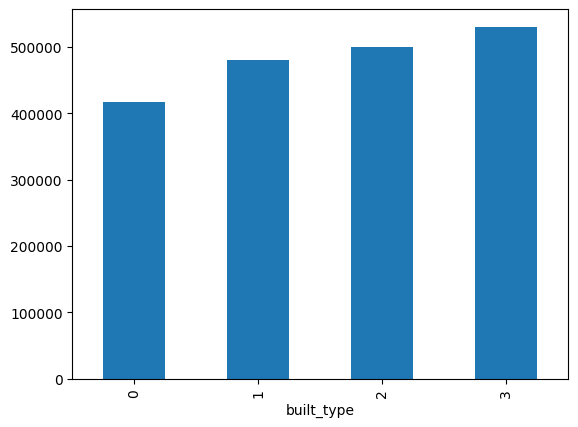

In [50]:
sqr_price_by_built_type = df.sqr_price.groupby(df['built_type']).mean()
sqr_price_by_built_type.plot(kind='bar')

'панельный': 0, 'кирпичный': 1, 'иное': 2, 'монолитный': 3

In [51]:
sqr_price_by_built_type

built_type
0     416610.43771
1    480321.642541
2    499410.038462
3    530654.116783
Name: sqr_price, dtype: Float64

In [52]:
sqr_price_by_built_type.values[-1]-sqr_price_by_built_type.values[0]

114043.67907277914

Результат: Монолитные дома в среднем за кв. м дороже панельных домов
на 114043 тысяч тенге


## 2. Рост средней цены за кв.м в зависимости от года постройки

In [53]:
mean_price_by_year = df['sqr_price'].groupby(df['year_built']).mean()
X,Y = mean_price_by_year.keys(), mean_price_by_year.values


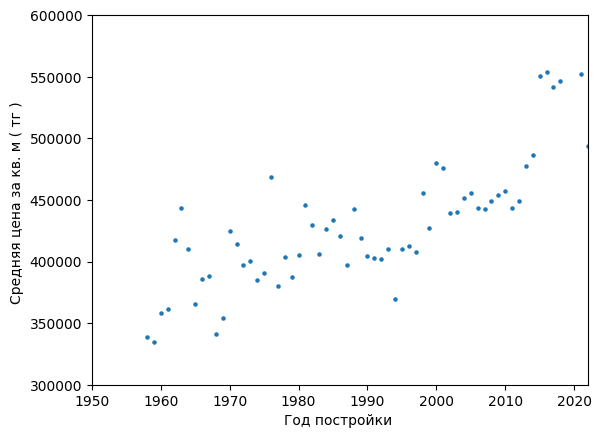

In [54]:
plt.scatter(X, Y, s=5)
plt.xlabel('Год постройки ')
plt.xlim(1950, 2022)
plt.ylabel('Средняя цена за кв. м ( тг ) ')
plt.ylim(300000, 600000)
plt.show()

In [55]:
mean_price_by_year.pct_change().mean()


0.0029650359143772605

Результат: Средняя цена за кв.м дома повышается с понижением его возраста.
На 0.296% с каждым годом.

## 3. Компании и специалисты имеют большую стоимость

<AxesSubplot: xlabel='userType'>

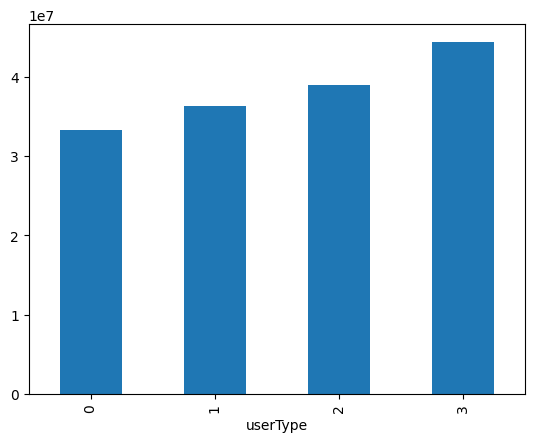

In [56]:
price_by_owner = df.price.groupby(df['userType']).mean()
price_by_owner.plot(kind='bar')

'Владелец': 0, 'Специалист': 1, 'Комлпекс': 2, 'Компания': 3

In [57]:
price_by_owner

userType
0    3.327360e+07
1    3.633787e+07
2    3.891233e+07
3    4.440065e+07
Name: price, dtype: float64

In [58]:
price_by_owner.values[-1]-price_by_owner.values[0]

11127051.004409272

Результат: Компании продают дома, в среднем на 11 млн дороже,
чем владельцы

# V. Модель

Цель: используя все данные, угадать цену объявления.

## 1. Входные и выходные данные
Так как мы высчитали sqr_price напрямую из price, использовать его в модели мы не будем.

In [59]:
X = df[[col for col in df if col not in ('price', 'sqr_price')]].values
y = df[['price']].values

## 2. Предварительное разделение на тренировочные/тестовые данные

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3. Стандартизация

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 4. Модели

In [62]:
model_scores = {}

### 4.1 Линейная регрессия

In [63]:
reg = LinearRegression()
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
model_scores['Линейная регрессия'] = score
print(score)

0.7749395657751281


### 4.2 Лассо

In [64]:
clf = GridSearchCV(
    Lasso(),
    param_grid = {
        'alpha': np.logspace(1, 8, 50),
        'fit_intercept': [True, False],
    },
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
clf.fit(X_train, y_train)
clf.best_params_


{'alpha': 1000000.0, 'fit_intercept': True}

In [65]:
reg = Lasso(**clf.best_params_)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
model_scores['Лассо'] = score
print(score)

0.7754341916111884


### 4.3 Ридж

In [66]:
clf = GridSearchCV(
    Ridge(),
    param_grid = {
        'fit_intercept': [True, False],
        'alpha': np.logspace(1, 8, 50)
    },
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
clf.fit(X_train, y_train)
clf.best_params_


{'alpha': 100.0, 'fit_intercept': True}

In [67]:
reg = Ridge(**clf.best_params_)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
model_scores['Ридж'] = score
print(score)


0.7810722356659234


### 4.4 ЭластикНэт

In [ ]:
clf = GridSearchCV(
    ElasticNet(),
    param_grid = {
        'fit_intercept': [True, False],
        'alpha': np.logspace(1, 8, 50),
        'l1_ratio': np.arange(0.0, 1.1, 0.1),
        'selection': ['cyclic', 'random']
    },
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
clf.fit(X_train, y_train)
clf.best_params_


In [ ]:
reg = ElasticNet(**clf.best_params_)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
model_scores['ЭластикНэт'] = score
print(score)

### Итог

In [ ]:
for k,v in model_scores.items():
    print(f"{k}: {v:.4f}")

# VI. Важность столбцов

## 1. Коэффициенты

Достаем все не нулевые коэффициенты столбцов и сортируем их

In [ ]:
fields = {
    field: val for field,val in zip(
        df[[col for col in df if col not in ('price', 'sqr_price')]],
        reg.coef_
    ) if abs(val) > 1000
}
fields = dict(sorted(fields.items(), key=lambda item: item[1]))
fields

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)
plt.bar(fields.keys(), fields.values())
plt.show()

## Итог

Самым важным столбцом является площадь. За ним жилой комплекс и высота потолков.

# VII. Выводы

Мы провели анализ объявлений на сайте krisha.kz.
Произвели множество действий для преобразования, очистки, стандартизации
входных данных. Сделали статистический анализ и проверили наши гипотезы.
Используя разные типы линейных регрессий, пытались угадать цену.


По итогу, лучшая модель (Ридж) показала результат в 0.78.


Самыми важными столбцами для регрессии оказались площадь и жилой комплекс.

